# DATA 2018

In [34]:
import os
import numpy as np
from PIL import Image
import seaborn as sns
import matplotlib.pyplot as plt

In [39]:
labels_dir = "./data_sample/training/labels"
label_files = [f for f in os.listdir(labels_dir) if f.endswith(".tif")]
mean_intensities = []
for file in label_files:
    file_path = os.path.join(labels_dir, file)
    image = Image.open(file_path).convert("L")
    image_array = np.array(image)

    mean_intensity = np.mean(image_array)
    mean_intensities.append(mean_intensity)

In [36]:
file_path = os.path.join(labels_dir, label_files[0])
image = Image.open(file_path).convert("L")
image_array = np.array(image)

print(image_array.shape)
with open('temp.log', 'w') as log_file:
    for row in image_array:
        log_file.write(np.array2string(row))

(500, 500)


In [40]:
print(len(label_files))
print(np.mean(mean_intensities))

734
0.01352009264305177


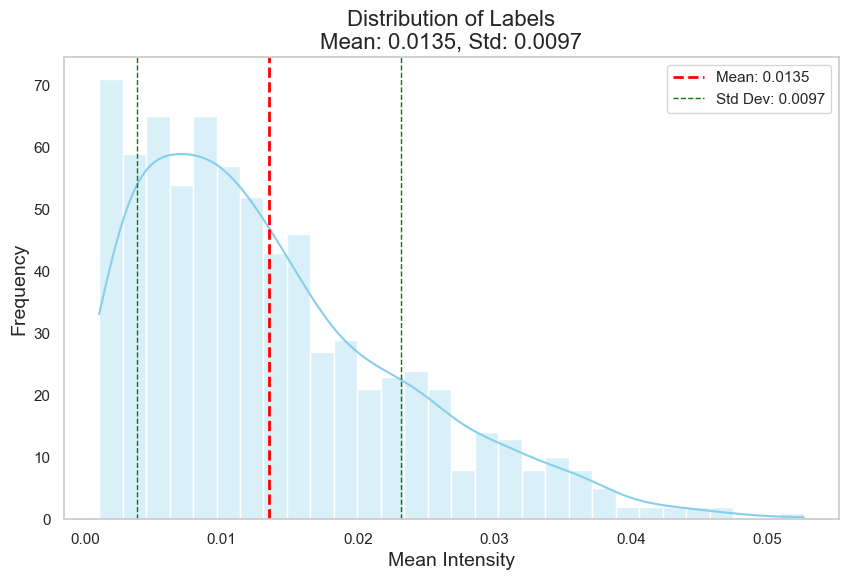

In [38]:
mean_value = np.mean(mean_intensities)
std_value = np.std(mean_intensities)

sns.set(style="whitegrid")

plt.figure(figsize=(10, 6))

sns.histplot(mean_intensities, bins=30, kde=True, color='skyblue', edgecolor=None, alpha=0.3)

decimal_precision = 4
plt.axvline(mean_value, color='red', linestyle='dashed', linewidth=2, label=f'Mean: {mean_value:.{decimal_precision}f}')
plt.axvline(mean_value + std_value, color='green', linestyle='dashed', linewidth=1, label=f'Std Dev: {std_value:.{decimal_precision}f}')
plt.axvline(mean_value - std_value, color='green', linestyle='dashed', linewidth=1)

plt.title(f"Distribution of Labels\nMean: {mean_value:.{decimal_precision}f}, Std: {std_value:.{decimal_precision}f}", fontsize=16)
plt.xlabel("Mean Intensity", fontsize=14)
plt.ylabel("Frequency", fontsize=14)
plt.legend()
plt.grid(False)

plt.savefig("mean_intensity_distribution.png")

plt.show()


# DATA 2024